# Assignment Overview


## Background Story  

ABC Insurance, once a market leader, has been noticing a worrying trend in its customer base – a gradual but steady increase in customer churn, alongside a static, sometimes faltering, customer lifetime value. The CEO, in a recent town hall, made it clear: "Our customers are the lifeblood of our business. Understanding them isn't just part of the job — it is the job."

Your task comes directly from the top: The CEO, in collaboration with the head of the marketing department, has formally requested a comprehensive analysis to unearth the hidden patterns within the customer data. They believe that the data holds the key to revitalizing ABC Insurance's customer engagement strategy, tailoring product offerings to individual needs, and ultimately turning the tide on churn.

## Data Description

The IT extracted three tables that contains the available information asked by the Head of Marketing: ABC_df_costumer, ABC_df_demographics, ABC_df_termination. 

Please download the data from: https://novasbe365-my.sharepoint.com/:f:/g/personal/nuno_silva_novasbe_pt/Ekl41SdwtkVOiW52LsaEy5QBo1mjQXHZKwKMeNSJRbEu3g?e=tgkSYD 

### Dataframes details 

#### df_customer:

Contains details about the customers, including their ID, address, policy start dates, and the current annual amounts for car, health, and house insurance.

##### Variables
INDIVIDUAL_ID: Unique identifier for the customer.

ADDRESS_ID: Address identifier for the customer.

CUST_ORIG_DATE: The original date when the customer joined.

DATE_OF_BIRTH: Customer's date of birth.

SOCIAL_SECURITY_NUMBER: Customer's SSN (for identification).

CUST_START_DATE: The start date of the customer's current policy.

CURR_ANN_AMT_CAR: Current annual amount paid for car insurance.

CURR_ANN_AMT_HEALTH: Current annual amount paid for health insurance.

CURR_ANN_AMT_HOUSE: Current annual amount paid for house insurance.


#### df_demographics:
Includes demographic information about the customers, such as income, family status, home ownership, and credit rating.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

INCOME: Customer's income.

HAS_CHILDREN: Indicates if the customer has children.

LENGTH_OF_RESIDENCE: How long the customer has lived in their current residence.

MARITAL_STATUS: Customer's marital status.

HOME_MARKET_VALUE: Market value of the customer's home.

HOME_OWNER: Indicates if the customer owns their home.

COLLEGE_DEGREE: Indicates if the customer has a college degree.

GOOD_CREDIT: Indicates if the customer has good credit.

ADVANCED_STUDIES: Indicates if the customer has pursued advanced studies.


#### df_termination:

Lists customers who have suspended their policies, including the suspension date.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

SUSPD_DATE: The date when the customer's policy was suspended.

## Question 1: Data Quality and Customer Understanding (30 points)

#### Background: Before delving into sophisticated analyses and model building, ensuring the integrity and quality of data is paramount. The provided datasets are critical for understanding ABC Insurance's clientele but may contain issues affecting their utility for further analysis.

#### Q1.1 Please perform the exploratory data analysis of the data. (20 points)

What specific metrics and techniques did you use to assess the quality of the data in each dataset? Describe the issues you identified in the datasets. For each issue, detail the impact it could have on analysis and decision-making processes. After cleaning, how did the data quality improve? Present metrics or observations to demonstrate the improvement in data quality.

In [54]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### EDA 
Customer Df

In [55]:
customerDF = pd.read_csv("ABC_df_customer.csv", dtype={'CUST_START_DATE':str})

# Drop the automacaly created colummn

customerDF= customerDF.loc[:, 'INDIVIDUAL_ID':'CURR_ANN_AMT_HOUSE']


First we need to check if there is any missing values in the dataframe provided. So we create a for loop to interate over all of the columns.

In [56]:
# Create a list with all of the columns in it 
customerDF_columns = list(customerDF.loc[:, 'INDIVIDUAL_ID':'CURR_ANN_AMT_HOUSE'])

# Iterate over the list 

for i in customerDF_columns:
    
# Sums all of the missing values  

    missing_count = customerDF[i].isna().sum()
    
    print(f"There are {missing_count} missing values in {i}")

There are 1 missing values in INDIVIDUAL_ID
There are 1 missing values in ADDRESS_ID
There are 0 missing values in CUST_ORIG_DATE
There are 0 missing values in DATE_OF_BIRTH
There are 0 missing values in SOCIAL_SECURITY_NUMBER
There are 91213 missing values in CUST_START_DATE
There are 0 missing values in CURR_ANN_AMT_CAR
There are 0 missing values in CURR_ANN_AMT_HEALTH
There are 0 missing values in CURR_ANN_AMT_HOUSE


With the previous analysis, we can conclude that there are 3 columns that we need to clean the missing data. Since two of them are IDs we can drop those columns because we can't discover the actual ID of those lines and we can't create another ID because we will need to join dataframes and the values won't match.

Regarding the CUST_START_DATE column, we don't need to fill these missing values because they won't be necessary to the following analysis.


In [57]:
customerDF.dropna(subset=['INDIVIDUAL_ID', 'ADDRESS_ID'], inplace=True)

Regarding the columns CUST_ORIG_DATE and CUST_START_DATE, the original date needs to be lower than the current policy date. So if this doesn't occur, we can drop those rows. 

In [58]:
customerDF[customerDF['CUST_ORIG_DATE'] > customerDF['CUST_START_DATE']].drop(inplace=True)

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

After droping the unecessary rows and columns, we need to check if there is any duplicaded rows in the df.

In [ ]:
#creates a mask of customerDF 
mask_duplicated = customerDF.duplicated()

#Applies the mask and counts all the rows
customerDF[mask_duplicated].count()

INDIVIDUAL_ID             0
ADDRESS_ID                0
CUST_ORIG_DATE            0
DATE_OF_BIRTH             0
SOCIAL_SECURITY_NUMBER    0
CUST_START_DATE           0
CURR_ANN_AMT_CAR          0
CURR_ANN_AMT_HEALTH       0
CURR_ANN_AMT_HOUSE        0
dtype: int64

Now we will analise the distribuition of each column, using matplotlib.pyplot histogram.

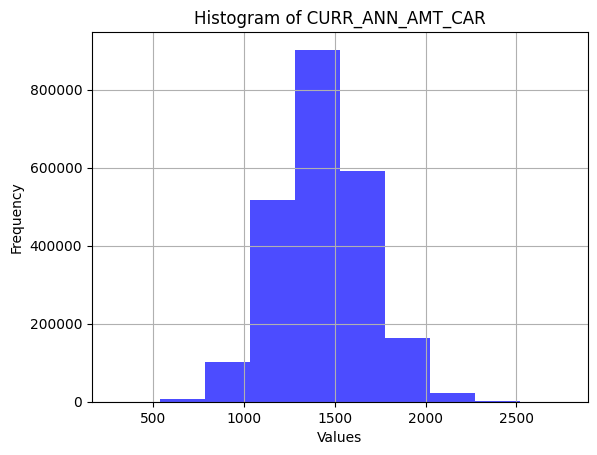

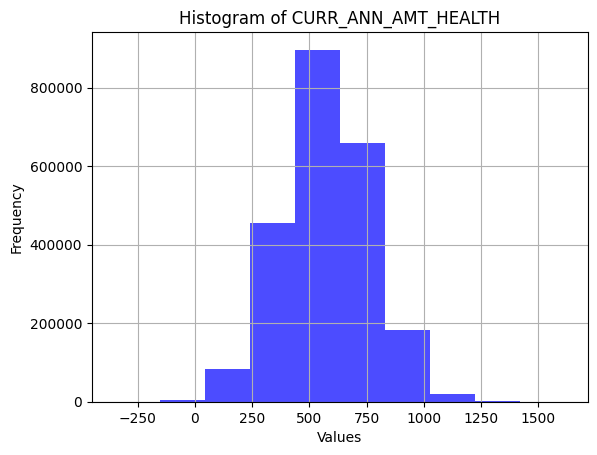

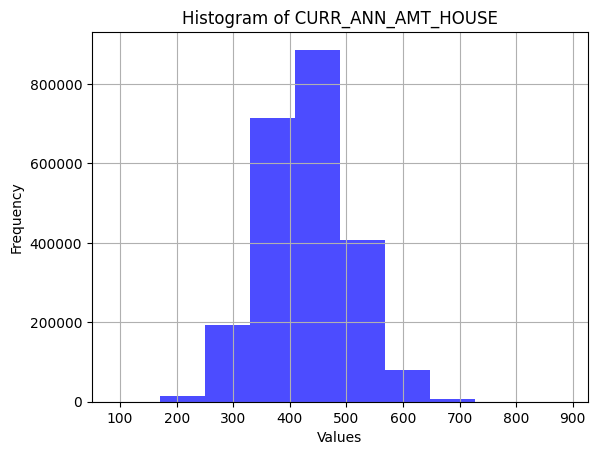

In [ ]:
for col in list(customerDF.loc[:,'CURR_ANN_AMT_CAR':'CURR_ANN_AMT_HOUSE']):
    
    data=customerDF[col]
    
    # Create a histogram with custom bins
    plt.hist(data, color='blue', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    


With the previous histograms we can observe a normal in all of the columns.

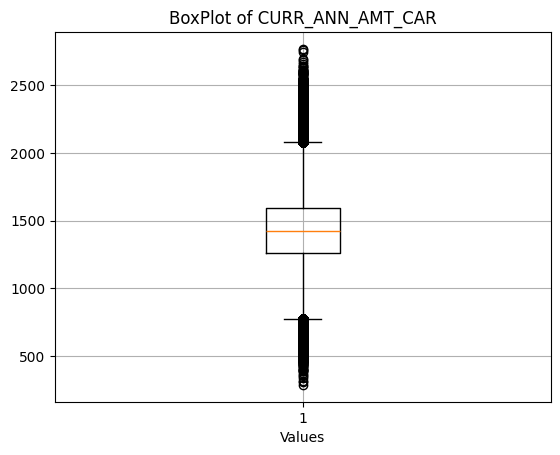

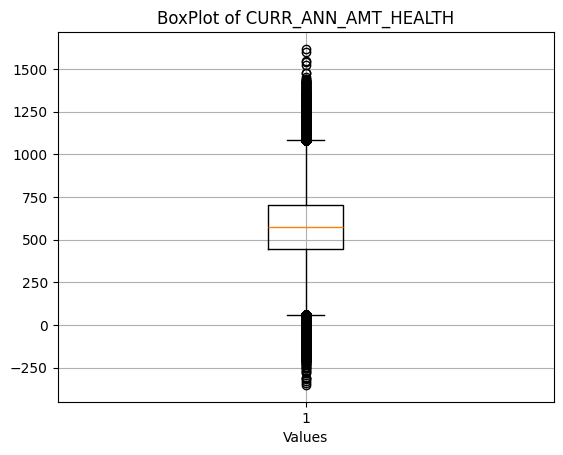

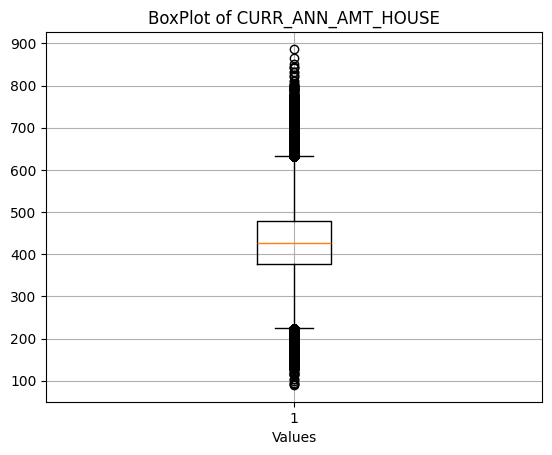

In [ ]:
for col in list(customerDF.loc[:,'CURR_ANN_AMT_CAR':'CURR_ANN_AMT_HOUSE']):
    
    data=customerDF[col]

    #Create a histogram with custom bins
    plt.boxplot(data)
    plt.title(f'BoxPlot of {col}')
    plt.xlabel('Values')
    plt.grid(True)
    plt.show()
    

With these boxplots we can see that there is no outliers in these columns. 

Now with all of the data clean we can check the basic statistcs, using panda's function describe().

In [ ]:
customerDF.loc[:,'CURR_ANN_AMT_CAR':'CURR_ANN_AMT_HOUSE'].describe()

,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
count,2.303123e+06,2.303123e+06,2.303123e+06
mean,1.431069e+03,5.725298e+02,4.293221e+02
std,2.439311e+02,1.896687e+02,7.606461e+01
min,2.869633e+02,-3.516244e+02,9.000000e+01
25%,1.264830e+03,4.442060e+02,3.770000e+02
50%,1.425758e+03,5.720245e+02,4.270000e+02
75%,1.591793e+03,7.001294e+02,4.790000e+02
max,2.769374e+03,1.617531e+03,8.870000e+02


### demographic DF

In [ ]:
demographicDF = pd.read_csv('ABC_df_demographic.csv')


demographicDF = demographicDF.loc[:,'INDIVIDUAL_ID':'ADVANCED_STUDIES']

In [ ]:
demographicDF.head(3)

,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES
0,2.213028e+11,187500.0,1.0,8.0,Single,300000 - 349999,1,1,1,Y
1,2.213032e+11,63750.0,0.0,0.0,Single,NaN,0,0,0,N
2,2.213032e+11,41250.0,0.0,15.0,Married,75000 - 99999,1,0,1,N


With the df imported we can start with checking if there is any missing values.

In [ ]:
demographic_columns = list(demographicDF.loc[:,'INDIVIDUAL_ID':'ADVANCED_STUDIES'])

# Iterate over the list 

for c in demographic_columns:
    
# Sums all of the missing values  

    missing_count = demographicDF[c].isna().sum()
    
    print(f"There are {missing_count} missing values in {c}")

There are 0 missing values in INDIVIDUAL_ID
There are 0 missing values in INCOME
There are 0 missing values in HAS_CHILDREN
There are 0 missing values in LENGTH_OF_RESIDENCE
There are 431648 missing values in MARITAL_STATUS
There are 190205 missing values in HOME_MARKET_VALUE
There are 0 missing values in HOME_OWNER
There are 0 missing values in COLLEGE_DEGREE
There are 0 missing values in GOOD_CREDIT
There are 0 missing values in ADVANCED_STUDIES


In [ ]:
demographicDF['HOME_MARKET_VALUE'].value_counts()


HOME_MARKET_VALUE
75000 - 99999      365838
100000 - 124999    330234
50000 - 74999      267363
125000 - 149999    250837
150000 - 174999    176274
175000 - 199999    116738
25000 - 49999      110761
200000 - 224999     81093
225000 - 249999     55308
250000 - 274999     37449
1000 - 24999        35604
300000 - 349999     25286
275000 - 299999     22632
350000 - 399999     14105
500000 - 749999     12319
400000 - 449999      8118
450000 - 499999      5977
750000 - 999999      3895
1000000 Plus         2543
Name: count, dtype: int64

As we can see there is multiple rows with missing values,so we will fill those lines with a new value called "Unknown".


In [ ]:
demographicDF['MARITAL_STATUS'].fillna('Unknown', inplace=True)

Since we have 2 columns that are not in a standard format we need to encode them into a a format that the algoritms will be able to read. 
So, we will use the LabelEnconder function to transform the column ADVANCED_STUDIES into a binary format. 

In [ ]:
le = LabelEncoder()

demographicDF['ADVANCED_STUDIES_ENCODED']=le.fit_transform(demographicDF['ADVANCED_STUDIES'])

 In the MARITIAL_STATUS we could see with the Missing values analysis that there was several rows that needed to be dealt with. So we will use the function OneHotEnconder to split the values Married, Single and Unkknown. We are using this method because we could not drop the columns where the values where missing because that accounted for one quarter of the dataset. Therefore, by creating 3 columns we can leave the unwanted data outside of the future model parameters.

In [ ]:

# 1. Ensure it's a Series, not just an array
marital_status_data = demographicDF['MARITAL_STATUS']

# 2. Convert to 2D Representation (column vector)
marital_status_data = marital_status_data.to_numpy().reshape(-1, 1)  

# 3. Now use the OneHotEncoder
ohe = OneHotEncoder(sparse=False)  
encoded_data = ohe.fit_transform(marital_status_data) 

new_column_names = ohe.get_feature_names_out(['MARITAL_STATUS'])
df_encoded = pd.DataFrame(encoded_data, columns=new_column_names)

# Concatenate with other DataFrame columns (assuming they align)
result_df = pd.concat([demographicDF, df_encoded], axis=1) 

# 1. Ensure it's a Series, not just an array
marital_status_data = demographicDF['MARITAL_STATUS']

# 2. Convert to 2D Representation (column vector)
marital_status_data = marital_status_data.to_numpy().reshape(-1, 1)  

# 3. Now use the OneHotEncoder
ohe = OneHotEncoder(sparse=False)  
encoded_data = ohe.fit_transform(marital_status_data) 

new_column_names = ohe.get_feature_names_out(['MARITAL_STATUS'])
df_encoded = pd.DataFrame(encoded_data, columns=new_column_names)


result_df

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,ADVANCED_STUDIES_ENCODED,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unknown
0,2.213028e+11,187500.000,1.0,8.0,Single,300000 - 349999,1,1,1,Y,1,0.0,1.0,0.0
1,2.213032e+11,63750.000,0.0,0.0,Single,NaN,0,0,0,N,0,0.0,1.0,0.0
2,2.213032e+11,41250.000,0.0,15.0,Married,75000 - 99999,1,0,1,N,0,1.0,0.0,0.0
3,2.213032e+11,120558.264,0.0,0.0,Unknown,1000 - 24999,1,0,0,N,0,0.0,0.0,1.0
4,2.213032e+11,187500.000,0.0,0.0,Unknown,NaN,0,0,1,Y,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112574,2.213006e+11,131250.000,1.0,12.0,Married,50000 - 74999,1,0,1,N,0,1.0,0.0,0.0
2112575,2.213006e+11,56250.000,1.0,5.0,Single,50000 - 74999,0,0,1,N,0,0.0,1.0,0.0
2112576,2.213006e+11,187500.000,0.0,13.0,Married,225000 - 249999,1,1,1,N,0,1.0,0.0,0.0
2112577,2.213006e+11,187500.000,2.0,12.0,Married,100000 - 124999,1,0,1,Y,1,1.0,0.0,0.0


To create the analisys of this dataframe we only need to select the columns that are in a standard format. 

In [ ]:
demographicDF_cleaned=result_df.drop(columns=['MARITAL_STATUS','ADVANCED_STUDIES'])

demographicDF_cleaned.head()

,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES_ENCODED,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unknown
0,2.213028e+11,187500.000,1.0,8.0,300000 - 349999,1,1,1,1,0.0,1.0,0.0
1,2.213032e+11,63750.000,0.0,0.0,NaN,0,0,0,0,0.0,1.0,0.0
2,2.213032e+11,41250.000,0.0,15.0,75000 - 99999,1,0,1,0,1.0,0.0,0.0
3,2.213032e+11,120558.264,0.0,0.0,1000 - 24999,1,0,0,0,0.0,0.0,1.0
4,2.213032e+11,187500.000,0.0,0.0,NaN,0,0,1,1,0.0,0.0,1.0


Now we need to check if the dataframe has duplicates. 

In [ ]:
#creates a mask of customerDF 
mask_duplicated = demographicDF.duplicated()

#Applies the mask and counts all the rows
demographicDF[mask_duplicated].count()

INDIVIDUAL_ID               0
INCOME                      0
HAS_CHILDREN                0
LENGTH_OF_RESIDENCE         0
MARITAL_STATUS              0
HOME_MARKET_VALUE           0
HOME_OWNER                  0
COLLEGE_DEGREE              0
GOOD_CREDIT                 0
ADVANCED_STUDIES            0
ADVANCED_STUDIES_ENCODED    0
dtype: int64

Since the dataframe doesn't have any duplicates we can proceed to the distribuition of each column. 

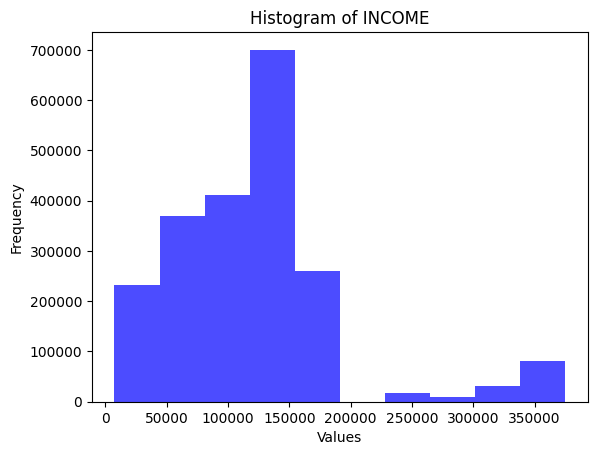

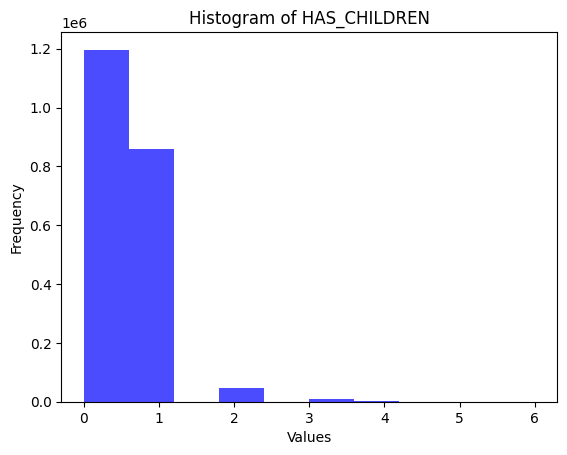

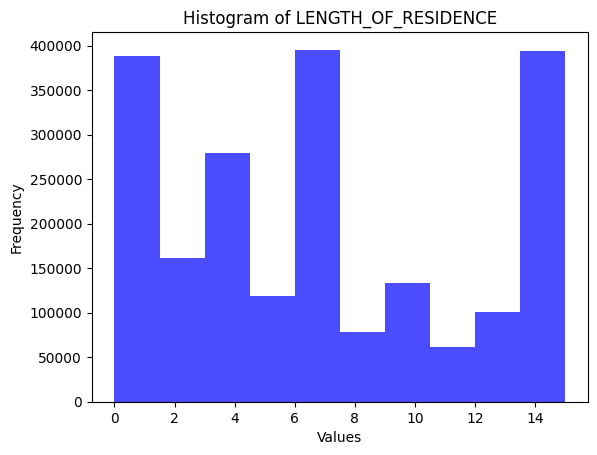

In [ ]:
for col in list(demographicDF_cleaned.loc[:,'INCOME':'LENGTH_OF_RESIDENCE']):
    
    data=demographicDF_cleaned[col]
    
    # Create a histogram with custom bins
    plt.hist(data, color='blue', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()
    

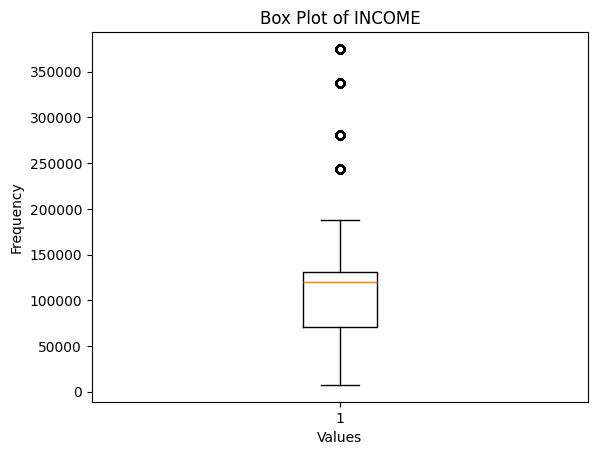

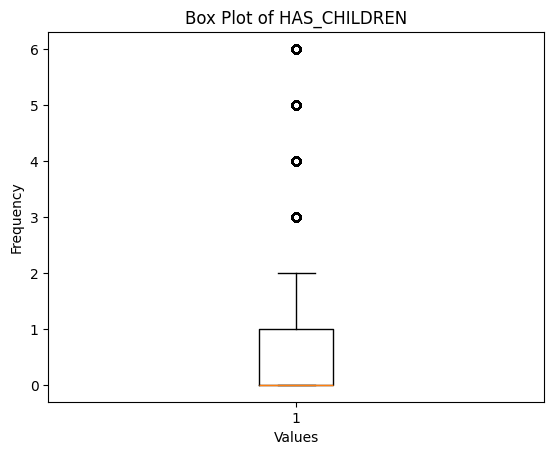

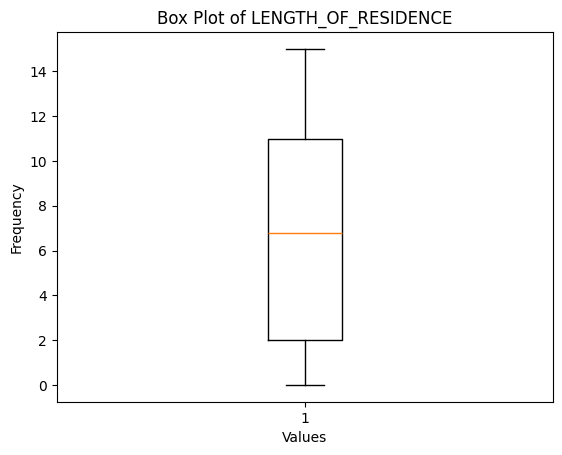

In [ ]:
for col in list(demographicDF_cleaned.loc[:,'INCOME':'LENGTH_OF_RESIDENCE']):
    
    data=demographicDF_cleaned[col]
    
    # Create a box plot
    plt.boxplot(data)
    plt.title(f'Box Plot of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()
    

In [ ]:
demographicDF_cleaned.describe()

,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES_ENCODED,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unknown
count,2.112579e+06,2.112579e+06,2.112579e+06,2.112579e+06,2.112579e+06,2.112579e+06,2.112579e+06,2.112579e+06,2.112579e+06,2.112579e+06,2.112579e+06
mean,2.213018e+11,1.205583e+05,4.684885e-01,6.800571e+00,6.983649e-01,3.016152e-01,8.195779e-01,2.600854e-01,4.962995e-01,2.993777e-01,2.043228e-01
std,9.916207e+05,7.504165e+04,5.853729e-01,5.090825e+00,4.589678e-01,4.589592e-01,3.845388e-01,4.386811e-01,4.999864e-01,4.579856e-01,4.032060e-01
min,2.213000e+11,7.500000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.213009e+11,7.125000e+04,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.213018e+11,1.205583e+05,0.000000e+00,6.801000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.213027e+11,1.312500e+05,1.000000e+00,1.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,2.213033e+11,3.750000e+05,6.000000e+00,1.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Terminiation DF

In [ ]:
terminationDF=pd.read_csv('ABC_df_termination.csv')

terminationDF=terminationDF.loc[:,'INDIVIDUAL_ID':'SUSPD_DATE']

**Missing Values** 

In [ ]:
termination_columns = list(terminationDF.loc[:,'INDIVIDUAL_ID':'SUSPD_DATE'])

# Iterate over the list 

for e in termination_columns:
    
# Sums all of the missing values  

    missing_count = terminationDF[e].isna().sum()
    
    print(f"There are {missing_count} missing values in {e}")

There are 0 missing values in INDIVIDUAL_ID
There are 2693 missing values in SUSPD_DATE


We don't need to drop or add any values to this dataframe because it onlys shows the customers that cancelled the service, so the only data we need is the ID of the client. 

We need to check if there is any missing values in the data provided.

In [ ]:
#creates a mask of customerDF 
mask_duplicated = terminationDF.duplicated()

#Applies the mask and counts all the rows
terminationDF[mask_duplicated].count()

INDIVIDUAL_ID    0
SUSPD_DATE       0
dtype: int64

In [ ]:
terminationDF['SUSPD_DATE'].describe()

count         266566
unique          2086
top       2022-03-17
freq             938
Name: SUSPD_DATE, dtype: object

#### Q1.2 Please describe in two paragraphs the main data insights. Connect the insight with the business  (10 points)


## Question 2: Predictive Modeling estimate Costumer Value (35 points)

#### Background: ABC Insurance aims to optimize its marketing and product offerings by predicting which customers are likely to be the most valuable. The CURR_ANN_AMT_CAR, CURR_ANN_AMT_HEALTH, and CURR_ANN_AMT_HOUSE fields in the df_customer dataset can serve as indicators of customer value.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

First we need to join both dataframes to analise the impact of demographics in the value of the customer.

In [ ]:
customer_demographicDF=demographicDF_cleaned.merge(customerDF,on='INDIVIDUAL_ID')

Then we need to create a column that represents the sum of all the columns. In order to predict the value as total.

In [ ]:
customer_demographicDF['CUSTOMER_VALUE']=customer_demographicDF['CURR_ANN_AMT_CAR']+customer_demographicDF['CURR_ANN_AMT_HOUSE']+customer_demographicDF['CURR_ANN_AMT_HEALTH']

#### Q2.1 Build a baseline model to estimate the costumer value based on their characteristics. (15 points)

In [ ]:
# Select features (independent variables) and target variable
X = customer_demographicDF[['INCOME','HAS_CHILDREN','LENGTH_OF_RESIDENCE','HOME_OWNER','COLLEGE_DEGREE','GOOD_CREDIT','MARITAL_STATUS_Married','ADVANCED_STUDIES_ENCODED','MARITAL_STATUS_Single']]  # Replace with your actual feature names
y = customer_demographicDF['CUSTOMER_VALUE']

# Create a multiple linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Evaluate the baseline model's performance
mse = mean_squared_error(y, predictions)

print("Mean Squared Error:", mse)


Mean Squared Error: 189108.31647363055


#### Q2.2 Build a second model to estimate the costumer value based on their characteristics and compare model performance. (10 points)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Select features (independent variables) and target variable
X = customer_demographicDF[['INCOME','HAS_CHILDREN','LENGTH_OF_RESIDENCE','HOME_OWNER','COLLEGE_DEGREE','GOOD_CREDIT','MARITAL_STATUS_Married','ADVANCED_STUDIES_ENCODED','MARITAL_STATUS_Single']]  # Replace with your actual feature names
y = customer_demographicDF['CUSTOMER_VALUE']

# Create a Random Forest regression model
model_rf = RandomForestRegressor()

# Fit the model
model_rf.fit(X, y)

# Make predictions
predictions_rf = model_rf.predict(X)

# Evaluate the Random Forest model's performance
mse_rf = mean_squared_error(y, predictions_rf)

# Select features (independent variables) and target variable
X = customer_demographicDF[['INCOME','HAS_CHILDREN','LENGTH_OF_RESIDENCE','HOME_OWNER','COLLEGE_DEGREE','GOOD_CREDIT','MARITAL_STATUS_Married','ADVANCED_STUDIES_ENCODED','MARITAL_STATUS_Single']]  # Replace with your actual feature names
y = customer_demographicDF['CUSTOMER_VALUE']

# Create a Gradient Boosting regression model
model_gb = GradientBoostingRegressor()

# Fit the model
model_gb.fit(X, y)

# Make predictions
predictions_gb = model_gb.predict(X)

# Evaluate the Gradient Boosting model's performance
mse_gb = mean_squared_error(y, predictions_gb)

print("Mean Squared Error (Gradient Boosting):", mse_gb)
print("Mean Squared Error (Random Forest):", mse_rf)


KeyboardInterrupt: 

#### Q2.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions. (10 points)

## Question 3: Churn Analysis and Prevention Strategy (35 points)

#### Background: Customer retention is a significant concern for ABC Insurance. The df_termination dataset indicates customers who have recently suspended their policies, providing a basis for analyzing churn.

#### Q3.1 Build a baseline model to predict customers that will churn. (15 points)

In [ ]:
#create a column in thewrmiantion df that says 1 to termination and 0 when joied in the custoemr df (via fillna)

#### Q3.2 Build a second model and compare the model performance. (15 points)

#### Q3.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions. (10 points)